# Read and write ZMAP files

The venerable ZMAP format looks like this:

```
! Landmark Zmap grid file name:   .DATANSLCU.dat
! Created/converted by Oasis Montaj, Geosoft Inc.
@.DATANSLCU.dat, GRID, 3
20, 1e+30, , 7, 1
208, 435, -630000.0, 672000.0, 2000000.0, 2621000.0
0.0, 0.0, 0.0
@
      -16481.9570313      -16283.9033203      -16081.5751953
      -15856.7861328      -15583.7167969      -15255.7343750
      -14869.3769531      -14426.1513672      -13915.8769531
```

Files often have a the extension `.DAT`. The first two lines shown are comments. The lines between the `@` signs give the name of the grid, with some metadata such as null value, precision, and so on.

`gio` wraps the [`zmapio`](https://github.com/abduhbm/zmapio) library. There are several functions:

- `read_zmap()`: read a ZMAP file.
- `array_to_zmap()`: write a NumPy array as a ZMAP file.
- `dataarray_to_zmap()`: write an Xarray `DataArray` as a ZMAP file.
- `xarray.DataArray.gio.to_zmap()`: an Xarray accessor providing another way to save a DataArray as a ZMAP file.

Let's read some data from a ZMAP file:

In [1]:
!head ../../data/ZMAP/NStopo.dat

! Landmark Zmap grid file name:   .\DATA\NStopo.dat
! Created/converted by Oasis Montaj, Geosoft Inc.
@.\DATA\NStopo.dat  ,GRID,  4
        20,   1.0E+30,       ,     7,       1
       208,       435,  -630000.0000,   672000.0000,  2000000.0000,  2621000.0000,
        0.0000,        0.0000,        0.0000,
@
         -67.2144775         -67.5697021         -67.1472168         -69.0812378
         -73.1813660         -74.3084717         -72.7660828         -72.0339966
         -70.5137329         -68.5551758         -66.1948547         -62.7756653


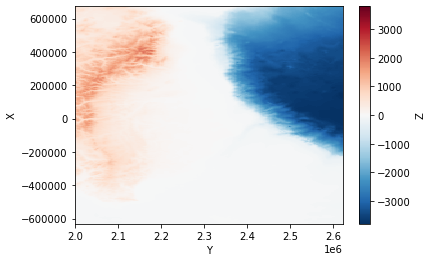

In [2]:
import gio

z = gio.read_zmap('../../data/ZMAP/NStopo.dat')

z.plot()

Let's take a look at the `xarray` object too:

In [3]:
z

<xarray.DataArray 'Z' (X: 435, Y: 208)>
array([[  -50.138916 ,   -50.7771301,   -49.3357849, ...,   -67.1472168,
          -67.5697021,   -67.2144775],
       [  -43.8048401,   -43.4010925,   -47.8291626, ...,   -72.3484497,
          -72.6132202,   -74.9806519],
       [  -39.550293 ,   -40.3817444,   -43.6928101, ...,   -78.2303467,
          -81.2595825,   -82.2666016],
       ...,
       [  702.7687378,   626.8185425,   472.8615723, ..., -2397.1206055,
        -2409.6945801, -2416.8630371],
       [  656.3284302,   587.7715454,   492.1585693, ..., -2378.3427734,
        -2391.8217773, -2398.3891602],
       [  581.6201782,   528.4921265,   453.5387573, ..., -2362.1647949,
        -2376.5600586, -2387.4147949]])
Coordinates:
  * X        (X) float64 -6.3e+05 -6.27e+05 -6.24e+05 ... 6.69e+05 6.72e+05
  * Y        (Y) float64 2e+06 2.003e+06 2.006e+06 ... 2.618e+06 2.621e+06

## Transform the surface

The units are feet; let's transform them to metres and save a new file.

In [1]:
z_m = 0.3048 * z

NameError: name 'z' is not defined

## Use the `xarray` accessory

If your surface is held in an `xarray.DataArray` then the accessory is the easiest way to save it in ZMAP format.

To use it, access the `to_zmap()` function in the `gio` accessory. After importing `gio`, the accessory is attached to every instance of a `DataArray`.

In [5]:
z_m.gio.to_zmap('NStopo_m.dat')

We can take a peek at this file using IPython to see if it looks legit:

In [6]:
!head ./NStopo_m.dat

!Generated by gio
@Z, GRID, 6
12, -999.25, , 3, 1
208, 435, -630000.0, 672000.0, 2000000.0, 2621000.0
0.0, 0.0, 0.0
@
     -15.282     -15.477     -15.038     -15.525     -15.521     -15.831
     -16.011     -15.794     -15.525     -15.646     -16.253     -16.347
     -16.479     -16.501     -16.574     -16.614     -16.764     -16.652
     -16.652     -15.775     -15.532     -16.106     -16.685     -17.111


## Use the function

If your surface is a NumPy array, then you can use the `array_to_zmap()` function.

Note that if you want the ZMAP file to have real-world coordinates, you will need to provide the `extent` as a list or tuple of min X, max X, min Y, max Y. For example:

In [7]:
arr = z_m.data

gio.array_to_zmap('NStopo_m.dat', arr, extent=[-630000.0, 672000.0, 2000000.0, 2621000.0])

It should look like the file we got before:

In [8]:
!head ./NStopo_m.dat

!Generated by gio
@Z, GRID, 6
12, -999.25, , 3, 1
208, 435, -630000.0, 672000.0, 2000000.0, 2621000.0
0.0, 0.0, 0.0
@
     -15.282     -15.477     -15.038     -15.525     -15.521     -15.831
     -16.011     -15.794     -15.525     -15.646     -16.253     -16.347
     -16.479     -16.501     -16.574     -16.614     -16.764     -16.652
     -16.652     -15.775     -15.532     -16.106     -16.685     -17.111
